**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Nov 23 07:27:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 1695884081.2863135
 1695884081.3142548
 1695884126.3520193
 1695884126.3613842
 annotaion_person_draw0.zip
 annotaion_person_draw.zip
 Audio2Head
 chip1.py
 coco_person_car_yolov4_22000.weights
'Colab Notebooks'
 config.json
'Copy of Copy of Copy of yolov4-custom_TRAINING_vf.ipynb'
'Copy of Copy of custom_yoloV5.ipynb'
'Copy of Copy of productCount_final_custom_yolov3.ipynb'
 events.out.tfevents.1695884081.a48e7dd1b69d.18859.0
 events.out.tfevents.1695884126.a48e7dd1b69d.19062.0
 Face_Recognition
 fake_review
'Fraser (1).docx'
 Fraser.gdoc
 GAN
'Gan_model '
 indian_test_team.jpg
 kaggle.json
'Latest Screenshots.docx'
 LipGAN
'model (1).safetensors'
 model.py
 model.safetensors
'My Drive'
 new_annotation
 preprocessor_config.json
 pretrained_models.zip
'Proposal for VA - FT.docx'
'Proposal for VA - FT - High level assumptions - feasibility  (1).gdoc'
'Proposal for VA - FT - High level assumptions - feasibility .gdoc'
 PySpark.gdoc
 scheduler_config.json
 Shar

**1) Clone the Darknet**



In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 15833 (delta 157), reused 219 (delta 140), pack-reused 15539
Receiving objects: 100% (15833/15833), 14.72 MiB | 5.71 MiB/s, done.
Resolving deltas: 100% (10591/10591), done.


**2) Compile Darknet using Nvidia GPU**


In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: un

**3) Configure Darknet network for training YOLO V3**

In [5]:
!ls

3rdparty	darknet			Dockerfile.cpu	       Makefile       scripts
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       net_cam_v3.sh  src
build		darknet_images.py	image_yolov3.sh        net_cam_v4.sh  vcpkg.json
build.ps1	darknet.py		image_yolov4.sh        obj	      vcpkg.json.opencv23
cfg		darknet_video.py	include		       package.xml    video_yolov3.sh
cmake		data			json_mjpeg_streams.sh  README.md      video_yolov4.sh
CMakeLists.txt	docker-compose.yml	LICENSE		       results


In [6]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [7]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [8]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3_hair_detect"

mkdir: cannot create directory ‘/mydrive/yolov3_hair_detect’: File exists


In [9]:
!echo "hair" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3_hair_detect' > data/obj.data
!mkdir data/obj

In [10]:
!ls /mydrive/yolov3_hair_detect/

classes.txt				yolov3_testing.cfg	      yolov3_training_last.weights
hair_annoted_images.zip			yolov3_training_1000.weights
productCount_final_custom_yolov3.ipynb	yolov3_training_2000.weights


In [11]:

!cp cfg/yolov3_training.cfg /mydrive/yolov3_hair_detect/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3_hair_detect/classes.txt

In [12]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-11-23 07:29:53--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  26.4MB/s    in 7.1s    

2023-11-23 07:30:01 (21.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [13]:
!unzip /mydrive/yolov3_hair_detect/hair_annoted_images.zip -d data/obj

Archive:  /mydrive/yolov3_hair_detect/hair_annoted_images.zip
  inflating: data/obj/hair1_jpg.rf.aacc5c1e55a6a3262be81d7437816953.jpg  
  inflating: data/obj/hair1_jpg.rf.aacc5c1e55a6a3262be81d7437816953.txt  
  inflating: data/obj/hair10_jpg.rf.842e0a1558093e2d53ca8839be4e697a.jpg  
  inflating: data/obj/hair10_jpg.rf.842e0a1558093e2d53ca8839be4e697a.txt  
  inflating: data/obj/hair11_jpg.rf.d88fcc37b1ce3539d7e8e366558780d1.jpg  
  inflating: data/obj/hair11_jpg.rf.d88fcc37b1ce3539d7e8e366558780d1.txt  
  inflating: data/obj/hair12_jpg.rf.6cb45e1c3f863a8e054dd2eedc102449.jpg  
  inflating: data/obj/hair12_jpg.rf.6cb45e1c3f863a8e054dd2eedc102449.txt  
  inflating: data/obj/hair13_jpg.rf.9dc6424334730aa77bbfa553ba62146b.jpg  
  inflating: data/obj/hair13_jpg.rf.9dc6424334730aa77bbfa553ba62146b.txt  
  inflating: data/obj/hair14_jpg.rf.59dd20796c1d2044833d4bb862966da3.jpg  
  inflating: data/obj/hair14_jpg.rf.59dd20796c1d2044833d4bb862966da3.txt  
  inflating: data/obj/hair15_jpg.rf.82c7

**6) Start the training**

In [14]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)
print(len(images_list))

['data/obj/hair32_jpg.rf.4a0ff0bcc42be9c783de3ea1e5c173ee.jpg', 'data/obj/hair27_jpg.rf.2bf63907475aa4c4a524485308c29fd5.jpg', 'data/obj/hair2_jpg.rf.da26f6433cbc6a117a8ed3a41821d4f7.jpg', 'data/obj/hair19_jpg.rf.100a9353fafe5e090c16507aba20a5cc.jpg', 'data/obj/hair37_jpg.rf.eb3f265e4b6493c0439c1d747d8faff3.jpg', 'data/obj/hair6_jpg.rf.9ae803e559689a9d19bb98ea5fbeb93e.jpg', 'data/obj/hair40_jpg.rf.4c2a2b32d7fdecfa0e252f34ec24b409.jpg', 'data/obj/hair10_jpg.rf.842e0a1558093e2d53ca8839be4e697a.jpg', 'data/obj/hair34_jpg.rf.1d1541da83834a2b0ec6779c0a20771d.jpg', 'data/obj/hair14_jpg.rf.59dd20796c1d2044833d4bb862966da3.jpg', 'data/obj/hair8_jpg.rf.dd9f5665027ce1603cf316a6e8ba3b8d.jpg', 'data/obj/hair11_jpg.rf.d88fcc37b1ce3539d7e8e366558780d1.jpg', 'data/obj/hair33_jpg.rf.5daf69d24c64f9fcc66588f8802eea42.jpg', 'data/obj/hair23_jpg.rf.f066da35c80861e2f759d90c48b70404.jpg', 'data/obj/hair13_jpg.rf.9dc6424334730aa77bbfa553ba62146b.jpg', 'data/obj/hair20_jpg.rf.864f3d316ec66f18649d0bc14479826f.

In [15]:
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [16]:
# Start the training
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3_hair_detect/yolov3_training_2000.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 163742, rewritten_bbox = 0.000000 % 
3926/4000: loss=0.1 hours left=0.1
 3926: 0.083616, 0.071219 avg loss, 0.001000 rate, 2.501766 seconds, 251264 images, 0.077009 hours left
Loaded: 0.000058 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.820489), count: 6, class_loss = 0.281213, iou_loss = 0.159526, total_loss = 0.440739 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.860910), count: 4, class_loss = 0.094572, iou_loss = 0.090116, total_loss = 0.184688 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
 total_bbox = 163752, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.877296), count: 7, class_loss = 0.005748, iou_loss = 0.126235, total_loss = 0.131983 
v3 (mse l

In [ ]:
#testing
!ls "data/obj.data"

data/obj.data


In [ ]:
#prediction and testing

In [ ]:
!cp "/content/darknet" -r "/content/gdrive/MyDrive/yolov3_hair_detect"


In [ ]:
#!./darknet detector test "data/obj.data" "cfg/yolov3_training.cfg" "/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights" '/content/gdrive/MyDrive/yolov3/pot0.jpg'

In [ ]:
!ls '/content/gdrive/MyDrive/yolov3_hair_detect'

classes.txt  pot10.jpg	pot5.jpg  yolov3_testing.cfg
images.zip   pot1.jpg	pot6.jpg  yolov3_training_1000.weights
obj.data     pot2.jpg	pot7.jpg  yolov3_training_last.weights
output	     pot3.jpg	pot8.jpg
pot0.jpg     pot4.jpg	pot9.jpg


[[0]
 [1]]
no. of bounding boxes 2


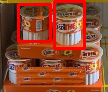

In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

weights ='/content/gdrive/MyDrive/yolov3_hair_detect/yolov3_training_1000.weights'
cfg = '/content/gdrive/MyDrive/yolov3_hair_detect/yolov3_testing.cfg'
#dataset ='/content/gdrive/MyDrive/yolov3/pot0.jpg'
# Load Yolo
net = cv2.dnn.readNet(weights, cfg)

# Name custom object
classes = ["pot"]

# Images path
img_path = '/content/gdrive/MyDrive/yolov3_hair_detect/pot10.jpg'


layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
#colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            # Object detected
            #print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 1)

print("no. of bounding boxes",len(indexes))
cv2.imwrite("/content/gdrive/MyDrive/yolov3_hair_detect/output/pot10.jpg", img)
cv2_imshow(img)


In [ ]:
indexes

array([[2],
       [4],
       [8],
       [7],
       [5],
       [3],
       [1],
       [0],
       [6]], dtype=int32)

In [ ]:
!pwd

/content/darknet


In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow
import imutils
weights ='/content/gdrive/MyDrive/yolov3_hair_detect/yolov3_training_final.weights'
cfg = '/content/gdrive/MyDrive/yolov3_hair_detect/yolov3_testing.cfg'
#dataset ='/content/gdrive/MyDrive/yolov3/pot0.jpg'
# Load Yolo
net = cv2.dnn.readNet(weights, cfg)

# Name custom object
classes = ["hair"]

# Images path
img_path = '/content/gdrive/MyDrive/yolov3_hair_detect/test/test9.jpg'


layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
#colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread(img_path)
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
#img =imutils.resize(img, width=640)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            # Object detected
            #print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        #color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 1)

print("no. of bounding boxes",len(indexes))
cv2.imwrite("/content/gdrive/MyDrive/yolov3_hair_detect/output/out_test1.jpg", img)
cv2_imshow(img)
